## Dataset for Training Computer Vision - Image Classification Models 

In [1]:
import pandas as pd

# Load the CSV file (corrected)
energy_df = pd.read_csv('/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Evaluation/energy_results.csv')

energy_df.head()

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,latitude,ram_total_size,tracking_mode,on_cloud,pue,experiment_name,model,dataset,epochs,batch_size
0,2025-05-19T16:06:28,deit_base_patch16_224_cifar100_100ep_bs64,6cf1e231-cc7d-41ec-a913-eb9f2b442981,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,14923.200884,0.657702,0.000044,47.5,331.584905,23.514394,...,49.1566,62.705051,machine,N,1.0,deit_base_patch16_224_cifar100_100ep_bs64,deit_base_patch16_224,cifar100,100,64
1,2025-05-19T19:59:56,deit_base_patch16_224_cifar100_100ep_bs128,268283ef-f5b0-4565-8c56-c46a1608e275,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,14003.927728,0.619070,0.000044,47.5,327.310632,23.514394,...,49.1566,62.705051,machine,N,1.0,deit_base_patch16_224_cifar100_100ep_bs128,deit_base_patch16_224,cifar100,100,128


In [2]:
# Columns to move
move_cols = ['experiment_name','model', 'dataset', 'epochs', 'batch_size']

# Only keep those that actually exist
move_cols = [col for col in move_cols if col in energy_df.columns]

# Reorder: place move_cols right after 'experiment_id'
if 'experiment_id' in energy_df.columns:
    cols = energy_df.columns.tolist()
    # Remove move_cols first
    for col in move_cols:
        cols.remove(col)
    # Insert move_cols after 'experiment_id'
    idx = cols.index('experiment_id') + 1
    new_order = cols[:idx] + move_cols + cols[idx:]
    df = energy_df[new_order]

# Save or view
df.to_csv('/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Evaluation/training_energy_ic_final.csv', index=False)
print("Columns reordered and saved.")
df.head()


Columns reordered and saved.


,timestamp,project_name,run_id,experiment_id,experiment_name,model,dataset,epochs,batch_size,duration,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2025-05-19T16:06:28,deit_base_patch16_224_cifar100_100ep_bs64,6cf1e231-cc7d-41ec-a913-eb9f2b442981,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,deit_base_patch16_224_cifar100_100ep_bs64,deit_base_patch16_224,cifar100,100,64,14923.200884,...,16,Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz,1,1 x NVIDIA GeForce RTX 3090,7.0322,49.1566,62.705051,machine,N,1.0
1,2025-05-19T19:59:56,deit_base_patch16_224_cifar100_100ep_bs128,268283ef-f5b0-4565-8c56-c46a1608e275,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,deit_base_patch16_224_cifar100_100ep_bs128,deit_base_patch16_224,cifar100,100,128,14003.927728,...,16,Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz,1,1 x NVIDIA GeForce RTX 3090,7.0322,49.1566,62.705051,machine,N,1.0


In [3]:
import os

energy_df = pd.read_csv('/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Evaluation/training_energy_ic_final.csv')

# Columns to extract from summary.csv
summary_columns = ['train_loss', 'eval_loss', 'eval_top1', 'eval_top5', 'lr']

combined_rows = []

# Base directory for summary files
base_dir = '/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Evaluation/exp_models'

# Iterate through energy data
for _, row in energy_df.iterrows():
    project_name = row['project_name']
    summary_path = os.path.join(base_dir, project_name, project_name, 'summary.csv')

    try:
        # Load last row from summary.csv
        summary_df = pd.read_csv(summary_path)
        last_row = summary_df[summary_columns].iloc[-1]
        combined = pd.concat([row, last_row])
        combined_rows.append(combined)
    except Exception as e:
        print(f"Error processing {project_name}: {e}")

# Create DataFrame from results
cv_energy_df = pd.DataFrame(combined_rows)

# Save output
cv_energy_df.to_csv('/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Evaluation/cv_energy_result.csv', index=False)
print("Created cv_energy_result.csv")


Created cv_energy_result.csv


### Merge exp

In [4]:
import pandas as pd

# Paths
original_path = '/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Dataset/image_classification/training_energy.csv'
new_path = '/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Evaluation/cv_energy_result.csv'

# Load both CSVs
df_original = pd.read_csv(original_path)
df_new = pd.read_csv(new_path)

# Define the key column(s) to check for duplicates (e.g., 'experiment_name')
# If multiple columns define uniqueness, pass a list like ['model', 'dataset', 'epochs']
duplicate_key = 'experiment_name'

# Remove new entries that already exist in the original
df_merged = pd.concat([df_original, df_new], ignore_index=True)
df_merged = df_merged.drop_duplicates(subset=duplicate_key, keep='first')

# Save back to original file (merged)
df_merged.to_csv(original_path, index=False)

print(f"✅ Merged. Final row count: {len(df_merged)}")


✅ Merged. Final row count: 252


### Check Duplicate

In [ ]:
import pandas as pd

# Path to your file
file_path = '/home/escade/ESCADE/code/git/pytorch-image-models/EE-Training/Dataset/image_classification/training_energy.csv'

# Load CSV
df = pd.read_csv(file_path)

# Identify duplicate experiment names
duplicate_experiments = df[df.duplicated(subset=["experiment_name"], keep=False)]

# Extract just the duplicated names
duplicate_names = duplicate_experiments["experiment_name"].dropna().unique()

# Print result
print(f"Found {len(duplicate_names)} duplicate experiment_name entries:")
for name in duplicate_names:
    print(name)


🟠 Found 0 duplicate experiment_name entries:


In [69]:
import os
import pandas as pd

# Load training_energy_ic.csv
df = pd.read_csv('./Dataset/image_classification/training_energy_ic.csv')

# Filter duplicated project_names
duplicates = df[df.duplicated(subset='project_name', keep=False)]

# Define the path to project folders
base_path = '/media/escade/ESCADE_EXT_SSD_BW/CV_IC_Training_Data/Train/Final_train/'

# Columns to match
columns_to_check = ['train_loss', 'eval_loss', 'eval_top1', 'eval_top5', 'lr']

rows_to_keep = []

# Iterate over each duplicate project name
for project_name in duplicates['project_name'].unique():
    project_folder = os.path.join(base_path, project_name, project_name)
    summary_path = os.path.join(project_folder, 'summary.csv')

    if os.path.exists(summary_path):
        try:
            summary_df = pd.read_csv(summary_path)
            # Take the last row (most recent results)
            summary_row = summary_df[columns_to_check].iloc[-1].round(5)

            # Find all matching rows in the main CSV
            match_rows = df[df['project_name'] == project_name]
            for idx, row in match_rows.iterrows():
                # Compare rounded values to avoid float precision issues
                if all(round(row[col], 5) == summary_row[col] for col in columns_to_check):
                    rows_to_keep.append(idx)
                    break  # keep only one match
        except Exception as e:
            print(f"Failed to read or process {summary_path}: {e}")

# Drop all other duplicates
cleaned_df = df.drop(index=[i for i in duplicates.index if i not in rows_to_keep])

# Save cleaned CSV
cleaned_df.to_csv('./Dataset/image_classification/training_energy_ic_cleaned.csv', index=False)
print("Cleaned CSV saved.")


Cleaned CSV saved.


In [46]:
print("Models:", cv_energy_df['model'].unique())
print("Batch:", cv_energy_df['batch_size'].unique())
print("Epoch:", cv_energy_df['epochs'].unique())
print("Dataset:", cv_energy_df['dataset'].unique())


Models: ['resnet18' 'resnet34' 'resnet50' 'resnet101' 'resnet152'
 'mobilenetv2_100' 'mobilenetv3_large_100' 'mobilenetv3_small_100'
 'efficientnet_b0' 'efficientnet_b3' 'efficientnetv2_s']
Batch: [ 32  64 128]
Epoch: [ 50  75 100]
Dataset: ['cifar10' 'cifar100']


In [14]:
from itertools import product

models = [
    "convnext_tiny",
    "deit_base_patch16_224",
    "efficientnet_b0",
    "efficientnet_b3",
    "efficientnetv2_s",
    "mobilenetv2_100",
    "mobilenetv3_large_100",
    "mobilenetv3_small_100",
    "resnet101",
    "resnet152",
    "resnet18",
    "resnet34",
    "resnet50",
    "vit_base_patch16_224"
]

datasets = ['cifar10', 'cifar100']
batches = [32, 64, 128]
epochs = [50,75, 100]

# Generate all combinations
full_combinations = pd.DataFrame(
    list(product(models, datasets, batches, epochs)),
    columns=['model', 'dataset', 'batch_size', 'epochs']
)

missing = pd.merge(full_combinations, df_merged, 
                   on=['model', 'dataset', 'batch_size', 'epochs'], 
                   how='left', indicator=True)
missing_only = missing[missing['_merge'] == 'left_only'].drop(columns=['_merge'])

# Output missing combinations
print(missing_only)


                    model   dataset  batch_size  epochs timestamp  \
32  deit_base_patch16_224  cifar100          64     100       NaN   
35  deit_base_patch16_224  cifar100         128     100       NaN   

   project_name run_id experiment_id experiment_name  duration  ...  latitude  \
32          NaN    NaN           NaN             NaN       NaN  ...       NaN   
35          NaN    NaN           NaN             NaN       NaN  ...       NaN   

    ram_total_size  tracking_mode  on_cloud  pue  train_loss  eval_loss  \
32             NaN            NaN       NaN  NaN         NaN        NaN   
35             NaN            NaN       NaN  NaN         NaN        NaN   

    eval_top1  eval_top5  lr  
32        NaN        NaN NaN  
35        NaN        NaN NaN  

[2 rows x 42 columns]


In [48]:
import os
import shutil
import pandas as pd

# Load result to keep only relevant folders
result_df = pd.read_csv('./Dataset/Train_1/cv_energy_result.csv')
valid_projects = set(result_df['project_name'].astype(str))

# Base folder containing project subfolders
base_dir = './Train/Train_1_IC/exp_models/'

# Delete folders not listed in the result
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path) and folder_name not in valid_projects:
        print(f"Deleting: {folder_path}")
        shutil.rmtree(folder_path)

print("Cleanup complete. Only relevant project folders retained.")


Deleting: ./Train/Train_1_IC/exp_models/efficientnet_b3_mnist_100ep_bs128
Deleting: ./Train/Train_1_IC/exp_models/resnet34_mnist_50ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/efficientnet_b7_cifar10_50ep_bs128
Deleting: ./Train/Train_1_IC/exp_models/efficientnet_b7_cifar10_75ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/efficientnet_b7_cifar10_50ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/efficientnet_b7_cifar100_50ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/resnet18_mnist_50ep_bs32
Deleting: ./Train/Train_1_IC/exp_models/efficientnet_b7_mnist_75ep_bs32
Deleting: ./Train/Train_1_IC/exp_models/resnet152_mnist_50ep_bs128
Deleting: ./Train/Train_1_IC/exp_models/resnet152_mnist_75ep_bs128
Deleting: ./Train/Train_1_IC/exp_models/resnet101_mnist_50ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/mobilenetv3_small_100_mnist_75ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/resnet34_mnist_75ep_bs64
Deleting: ./Train/Train_1_IC/exp_models/mobilenetv3_large_100_mnist_50ep_bs128
Dele

In [49]:
result_df.head()

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,experiment_name,model,dataset,epochs,batch_size,train_loss,eval_loss,eval_top1,eval_top5,lr
0,2025-04-17T10:56:12,resnet18_cifar10_50ep_bs32,ae5f106a-aa96-4e0c-b578-f7ee11628908,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1557.967729,0.068793,0.000044,47.5,339.563541,23.514397,...,resnet18_cifar10_50ep_bs32,resnet18,cifar10,50,32,1.440151,0.361001,91.45,99.69,0.000012
1,2025-04-17T11:18:25,resnet18_cifar10_50ep_bs64,4ce9f771-a77d-4024-ad77-f222010a5149,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1328.703066,0.058414,0.000044,47.5,333.839866,23.514397,...,resnet18_cifar10_50ep_bs64,resnet18,cifar10,50,64,1.415190,0.360727,91.48,99.75,0.000025
2,2025-04-17T11:39:38,resnet18_cifar10_50ep_bs128,f2e8ddcc-8a71-43ca-baa4-bd3553059652,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,1268.876817,0.055481,0.000044,47.5,332.314912,23.514397,...,resnet18_cifar10_50ep_bs128,resnet18,cifar10,50,128,1.411599,0.358214,91.41,99.74,0.000049
3,2025-04-17T12:17:49,resnet18_cifar10_75ep_bs32,650e761d-4363-43ff-a375-df5a9dfa1959,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,2286.686023,0.101116,0.000044,47.5,333.856072,23.514397,...,resnet18_cifar10_75ep_bs32,resnet18,cifar10,75,32,1.336245,0.322041,93.39,99.86,0.000005
4,2025-04-17T12:51:49,resnet18_cifar10_75ep_bs64,a864441e-a566-48d3-b865-d2d3c77ca163,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,2035.022724,0.089453,0.000044,47.5,335.696058,23.514397,...,resnet18_cifar10_75ep_bs64,resnet18,cifar10,75,64,1.325837,0.318305,92.97,99.78,0.000011


In [53]:
import pandas as pd

# File paths
files = [
    './Dataset/Train_1/cv_energy_result.csv',
    './Dataset/Train_2/cv_energy_result.csv',
    './Dataset/Train_3/cv_energy_result.csv'
]

# Initialize
individual_counts = []
combined_df = pd.DataFrame()

# Loop through files and combine
for i, file in enumerate(files, start=1):
    df = pd.read_csv(file)
    individual_counts.append((f"Train_{i}", len(df)))
    if i == 1:
        base_columns = list(df.columns)
        combined_df = df.copy()
    else:
        if list(df.columns) == base_columns:
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        else:
            print(f"Skipped due to column mismatch: {file}")

# Save combined result
combined_path = './Dataset/image_classification/training_energy_ic.csv'
combined_df.to_csv(combined_path, index=False)

# Add total count
individual_counts.append(("Combined", len(combined_df)))

# Print results
for name, count in individual_counts:
    print(f"{name}: {count} rows")

Train_1: 187 rows
Train_2: 9 rows
Train_3: 6 rows
Combined: 202 rows


In [56]:
# Check for completely duplicate rows
duplicates = combined_df[combined_df.duplicated()]
print(f"Total duplicate rows: {len(duplicates)}")

# Optionally display them
if not duplicates.empty:
    display(duplicates)

Total duplicate rows: 0


In [66]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('./Dataset/image_classification/training_energy_ic.csv')

# Find duplicate project_name entries
duplicate_names = df[df.duplicated(subset='project_name', keep=False)]

print(f"Total duplicate project_name entries: {len(duplicate_names)}")

# Display duplicates if any
if not duplicate_names.empty:
    display(duplicate_names)


Total duplicate project_name entries: 14


,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,experiment_name,model,dataset,epochs,batch_size,train_loss,eval_loss,eval_top1,eval_top5,lr
180,2025-04-27T17:13:23,efficientnetv2_s_cifar10_50ep_bs32,299fad6a-af23-4b7a-bdd2-b84e91a091e4,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,6658.707057,0.292226,0.000044,47.5,337.161681,23.514397,...,efficientnetv2_s_cifar10_50ep_bs32,efficientnetv2_s,cifar10,50,32,1.294638,0.344308,93.27,99.72,0.000012
181,2025-04-27T18:55:33,efficientnetv2_s_cifar10_50ep_bs64,1ac58971-ad37-412f-a7ad-be313d44d9fe,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,6125.291678,0.270145,0.000044,47.5,317.855100,23.514397,...,efficientnetv2_s_cifar10_50ep_bs64,efficientnetv2_s,cifar10,50,64,1.277864,0.335935,93.24,99.76,0.000025
182,2025-04-27T20:35:51,efficientnetv2_s_cifar10_50ep_bs128,2f58cdeb-86bd-4777-ac49-01fbf279a627,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,6014.175733,0.264841,0.000044,47.5,332.601432,23.514397,...,efficientnetv2_s_cifar10_50ep_bs128,efficientnetv2_s,cifar10,50,128,1.267454,0.330873,93.60,99.68,0.000049
183,2025-04-27T23:22:31,efficientnetv2_s_cifar10_75ep_bs32,061d4cc7-fa45-4f31-8767-3d812a6e20fc,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,9995.306416,0.439635,0.000044,47.5,325.831435,23.514397,...,efficientnetv2_s_cifar10_75ep_bs32,efficientnetv2_s,cifar10,75,32,1.236316,0.318127,94.10,99.67,0.000005
184,2025-04-28T01:55:26,efficientnetv2_s_cifar10_75ep_bs64,6991acf9-7982-4a1f-b084-cd590c21ad5c,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,9170.516973,0.403779,0.000044,47.5,313.826314,23.514397,...,efficientnetv2_s_cifar10_75ep_bs64,efficientnetv2_s,cifar10,75,64,1.226381,0.327501,93.95,99.75,0.000011
185,2025-04-28T04:25:47,efficientnetv2_s_cifar10_75ep_bs128,79f53d60-a372-4c4a-9ff4-5ee35c7d50dc,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,9017.064632,0.396975,0.000044,47.5,272.323182,23.514397,...,efficientnetv2_s_cifar10_75ep_bs128,efficientnetv2_s,cifar10,75,128,1.220454,0.342115,93.76,99.62,0.000022
186,2025-04-28T08:08:04,efficientnetv2_s_cifar10_100ep_bs32,e980ec35-5006-48f0-a811-145e47a5aea0,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,13333.243276,0.587043,0.000044,47.5,337.683187,23.514397,...,efficientnetv2_s_cifar10_100ep_bs32,efficientnetv2_s,cifar10,100,32,1.204497,0.338823,94.39,99.69,0.000003
187,2025-04-28T15:49:54,efficientnetv2_s_cifar10_50ep_bs32,deaedd4d-9fea-4ff3-9d80-92f7ab16dafe,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,6966.342188,0.306276,0.000044,47.5,315.069013,23.514399,...,efficientnetv2_s_cifar10_50ep_bs32,efficientnetv2_s,cifar10,50,32,1.292676,0.344631,93.36,99.70,0.000012
188,2025-04-28T17:33:27,efficientnetv2_s_cifar10_50ep_bs64,f4d5f14b-a1a8-4f75-80a7-507d7bde0ec1,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,6208.360965,0.273803,0.000044,47.5,335.680067,23.514399,...,efficientnetv2_s_cifar10_50ep_bs64,efficientnetv2_s,cifar10,50,64,1.275914,0.324296,93.45,99.75,0.000025
189,2025-04-28T19:13:44,efficientnetv2_s_cifar10_50ep_bs128,d9e62d2a-1642-4c47-8fa2-04c75adf33c4,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,6013.148472,0.264714,0.000044,47.5,332.900200,23.514399,...,efficientnetv2_s_cifar10_50ep_bs128,efficientnetv2_s,cifar10,50,128,1.270168,0.332480,93.34,99.74,0.000049


## Plotting 

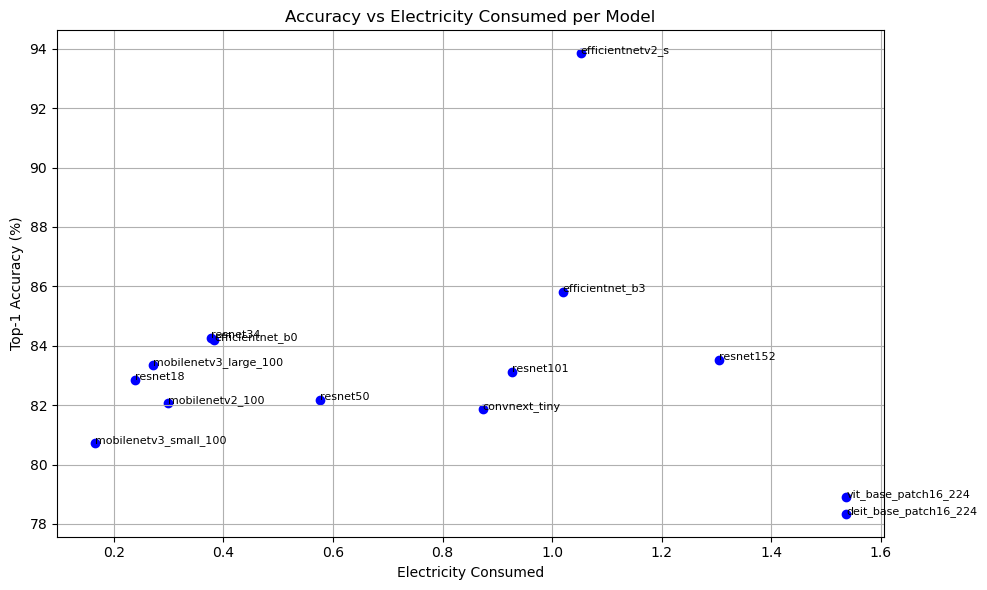

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./Dataset/image_classification/training_energy_ic.csv")

# Group by model and calculate average energy and accuracy
summary_df = df.groupby('model')[['energy_consumed', 'eval_top1']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['energy_consumed'], summary_df['eval_top1'], color='blue')

# Annotate each point
for _, row in summary_df.iterrows():
    plt.text(row['energy_consumed'], row['eval_top1'], row['model'], fontsize=8)

plt.title("Accuracy vs Electricity Consumed per Model")
plt.xlabel("Electricity Consumed (kWh)")
plt.ylabel("Top-1 Accuracy (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


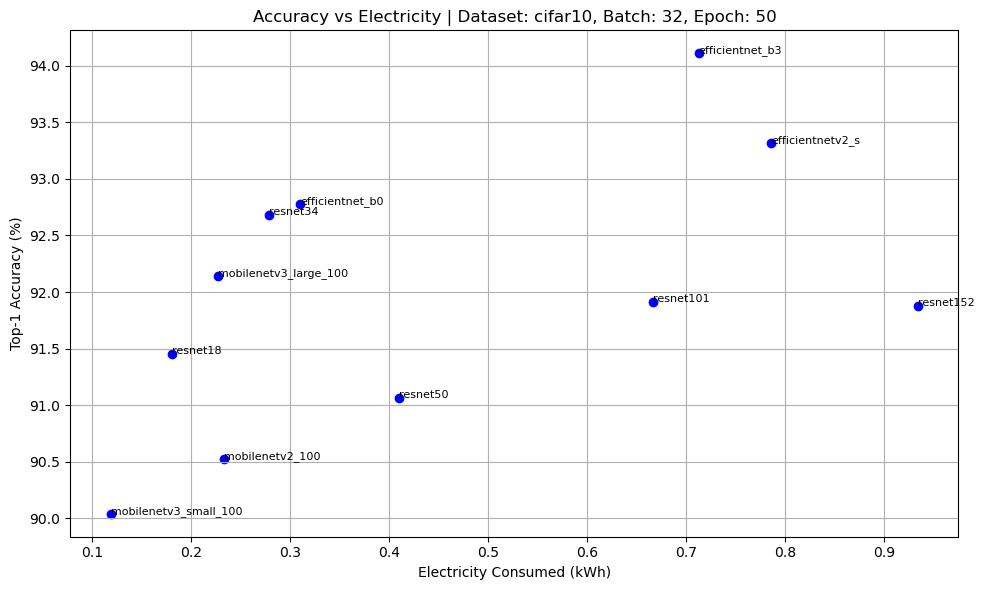

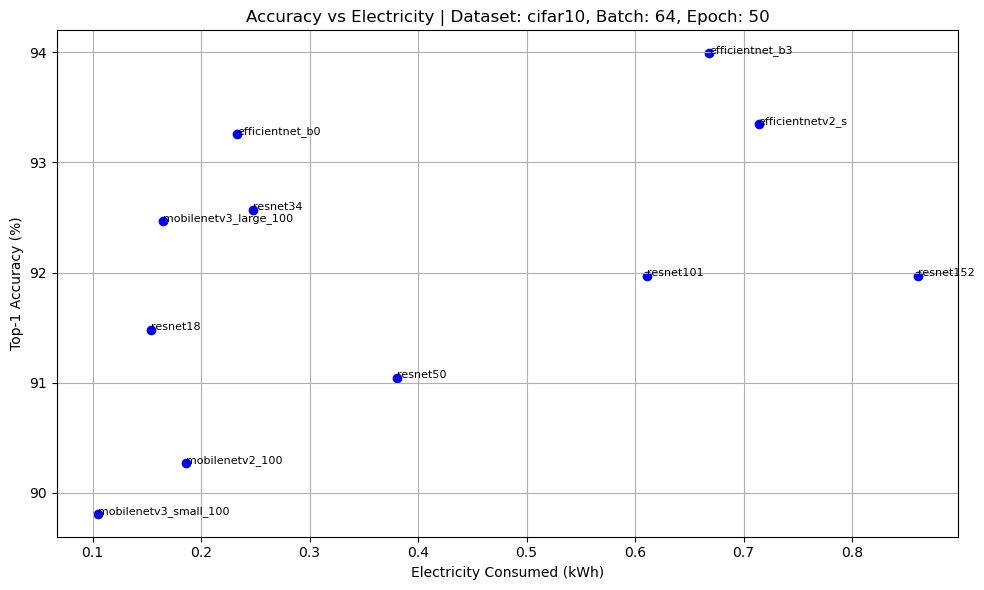

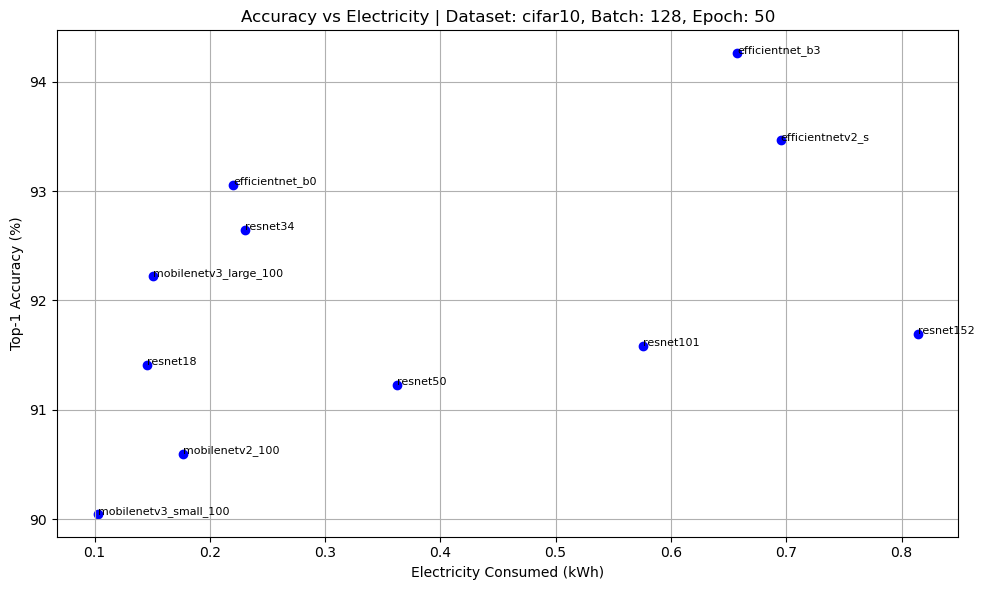

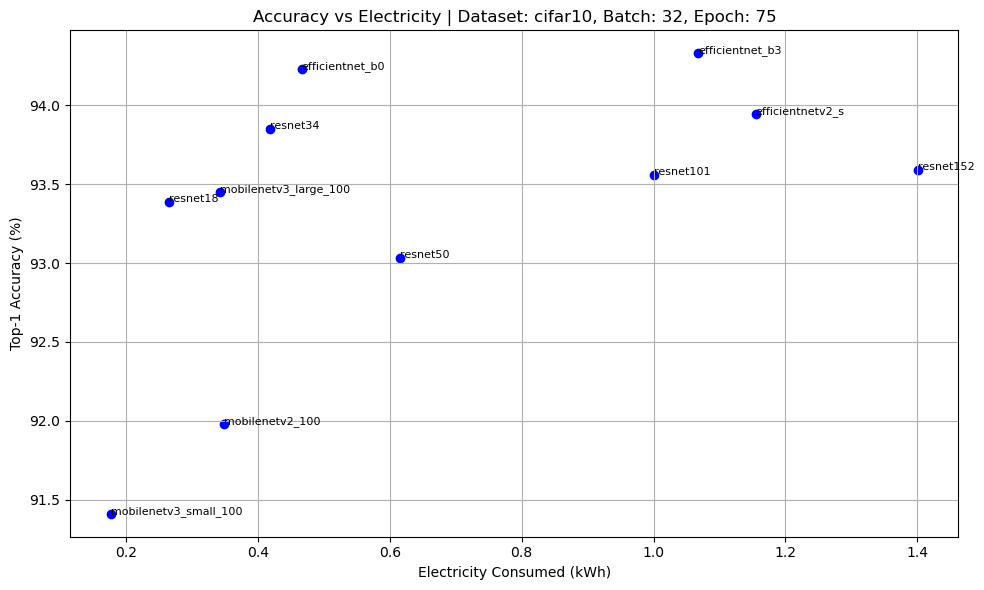

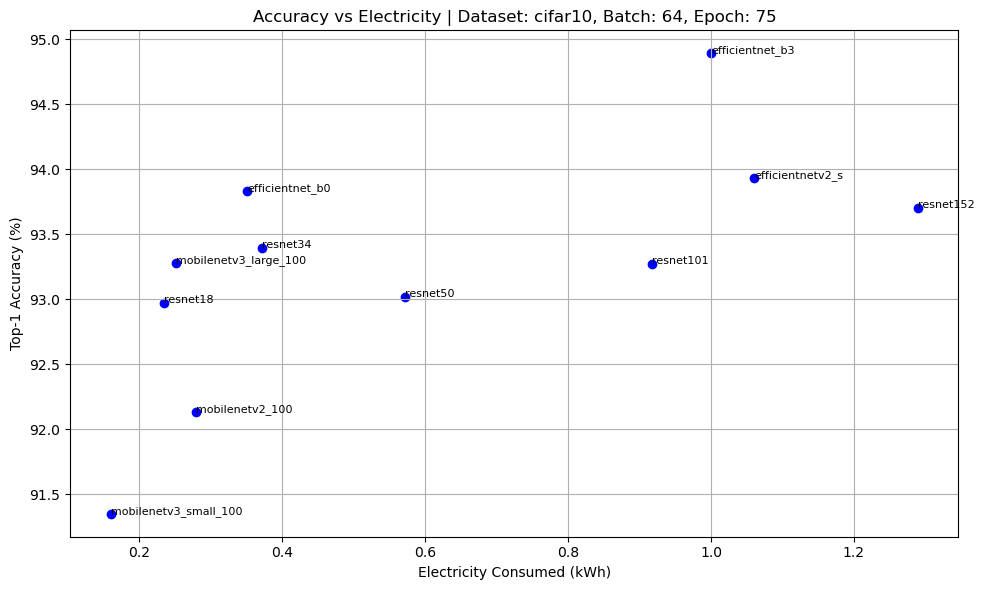

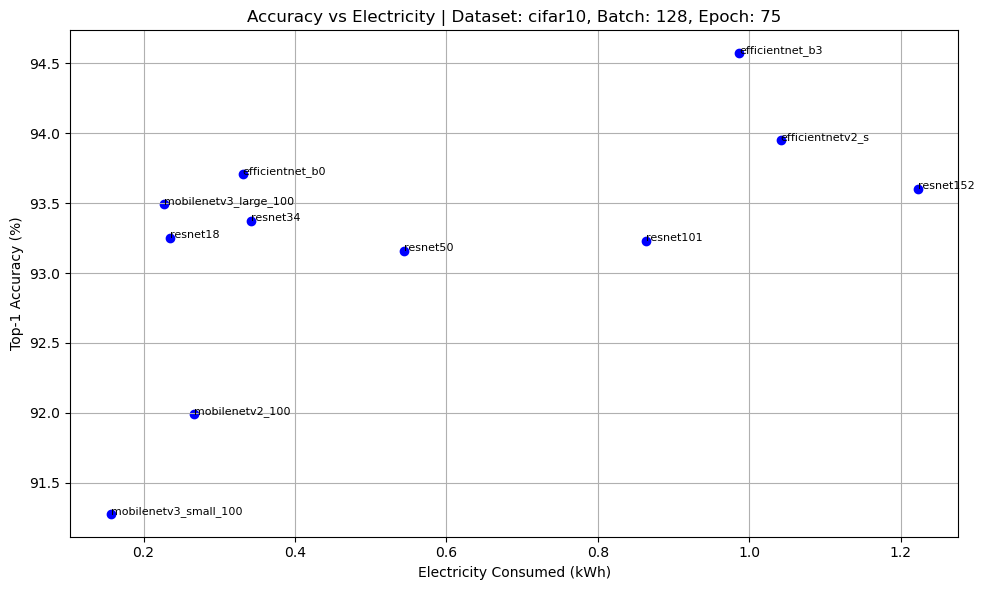

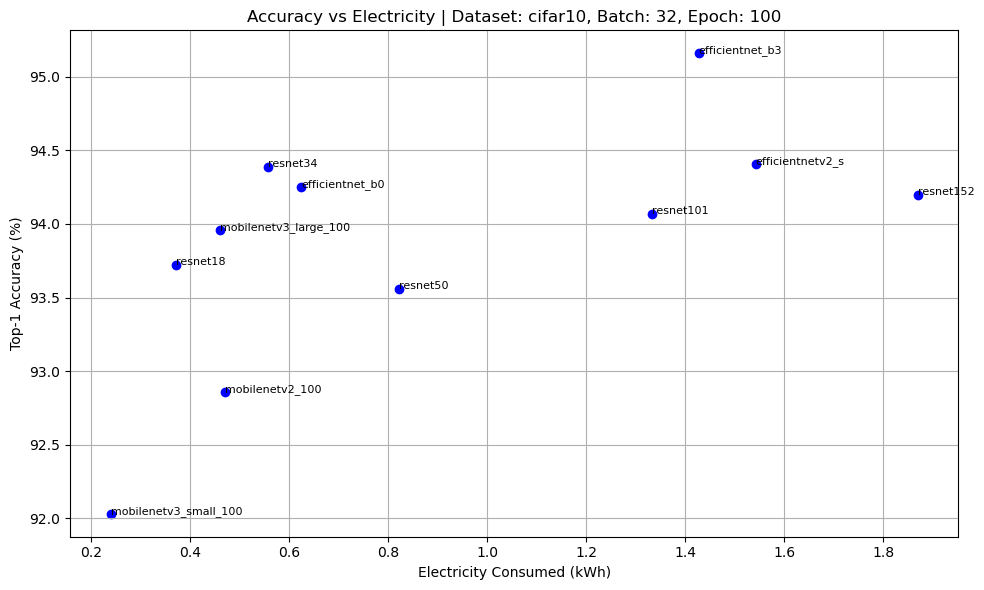

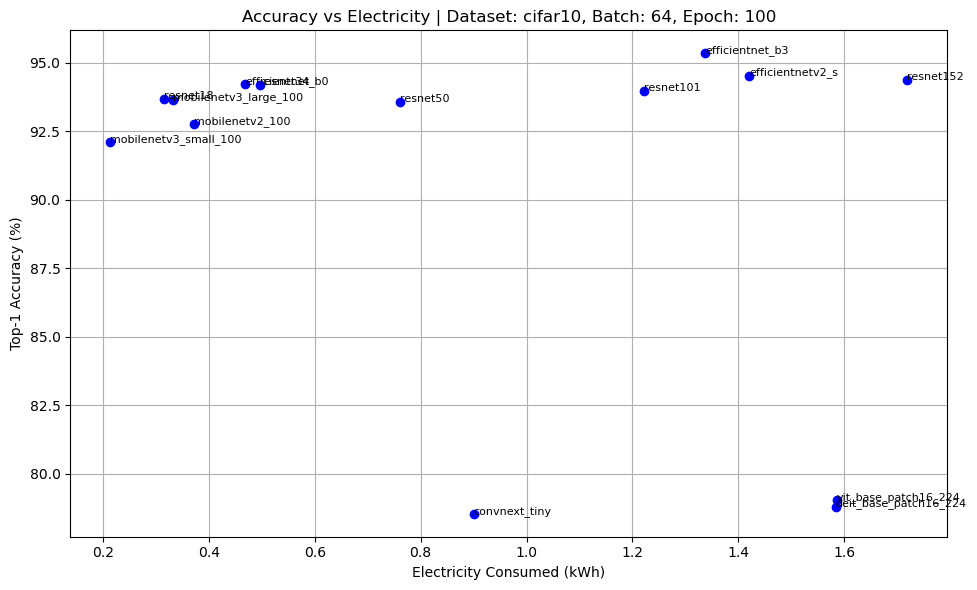

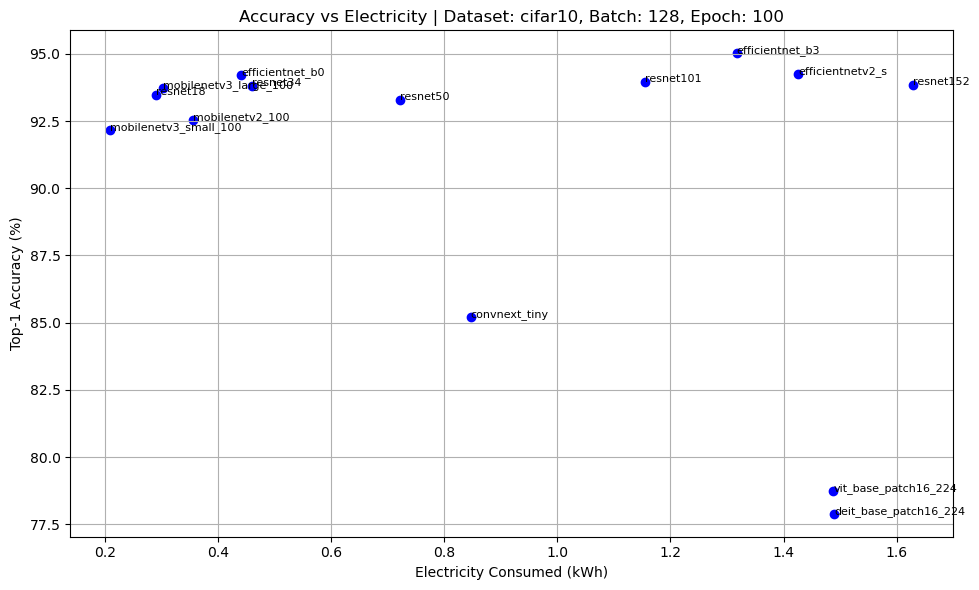

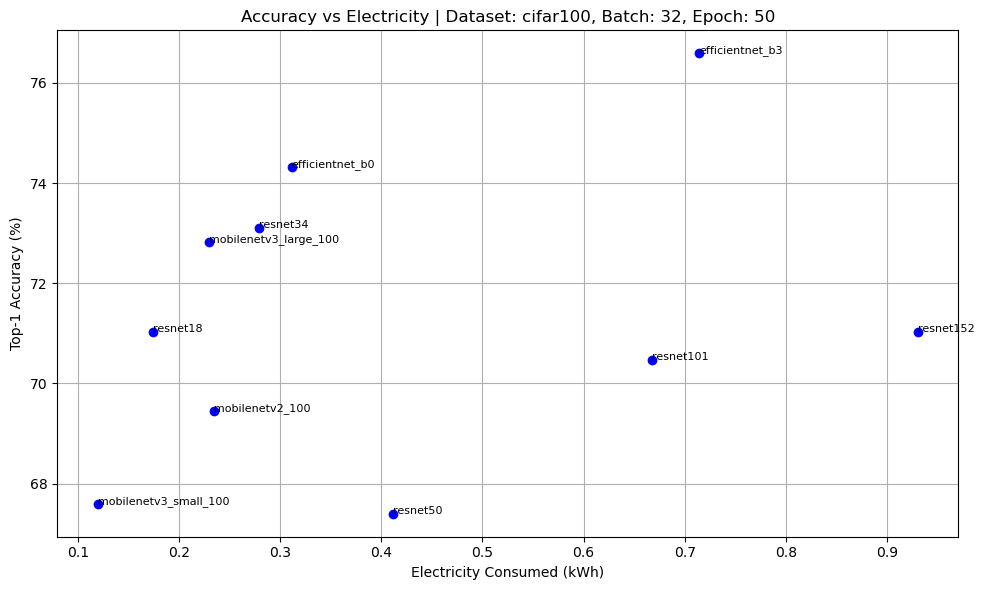

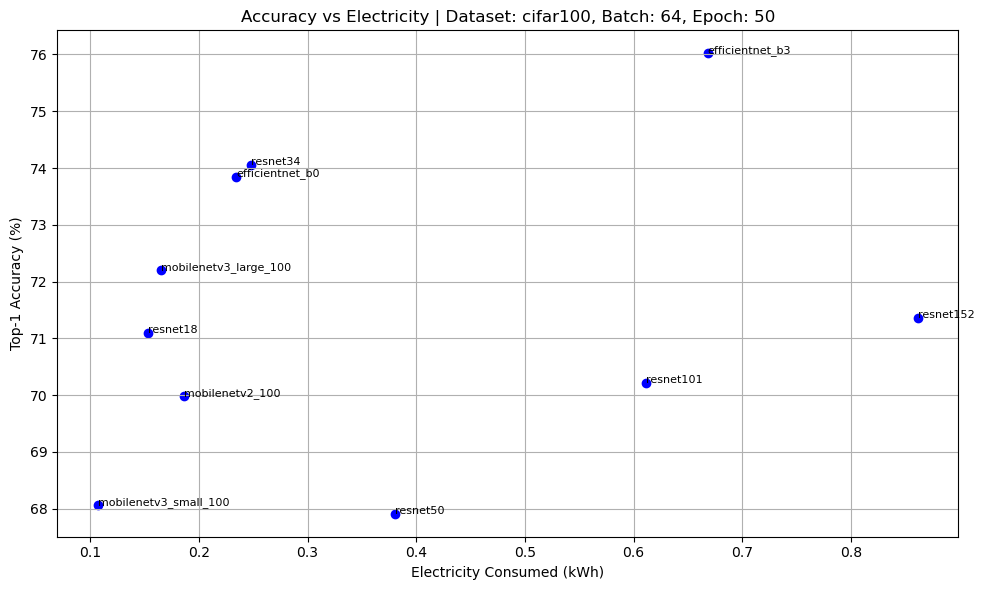

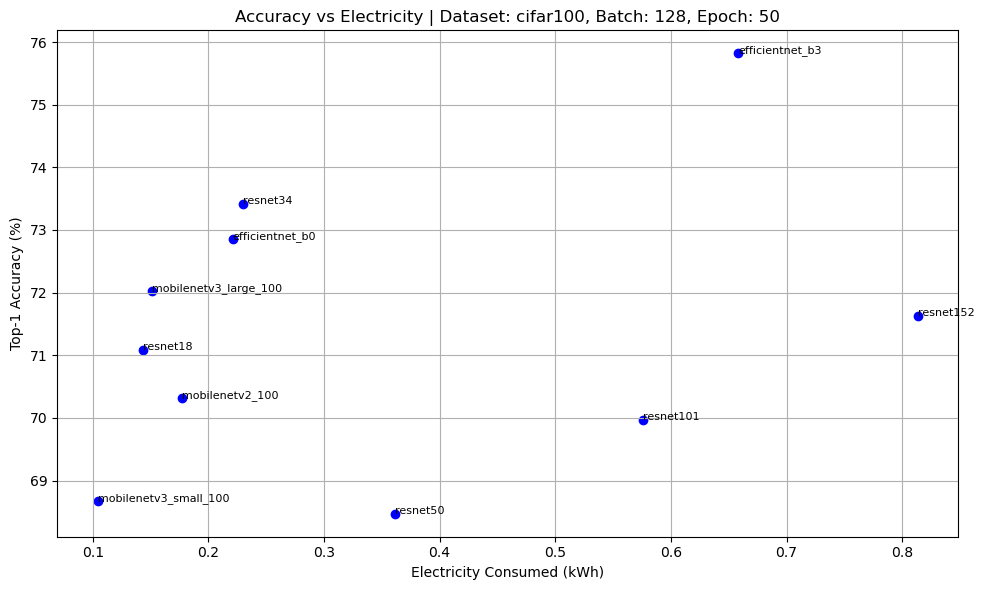

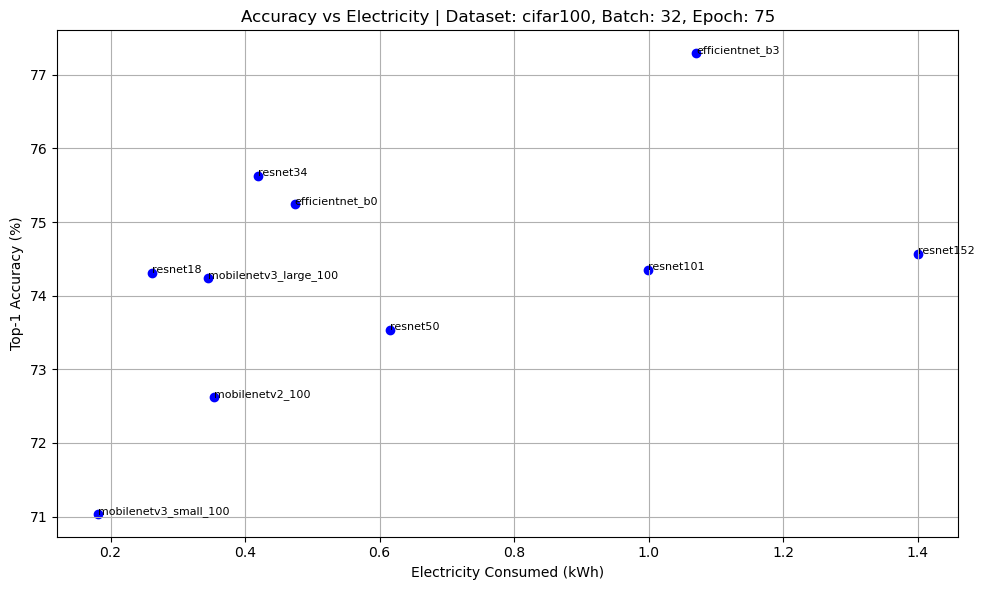

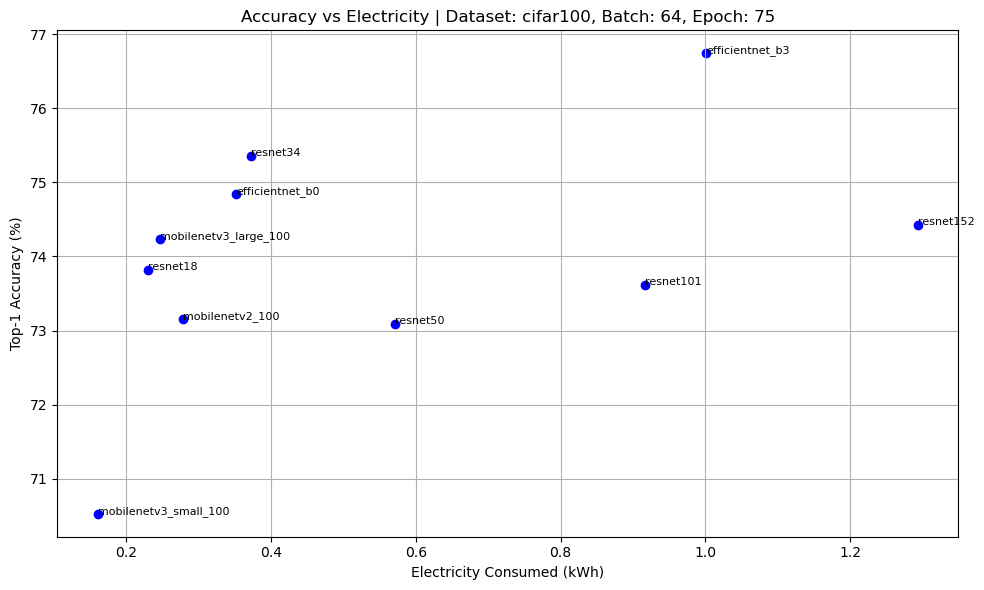

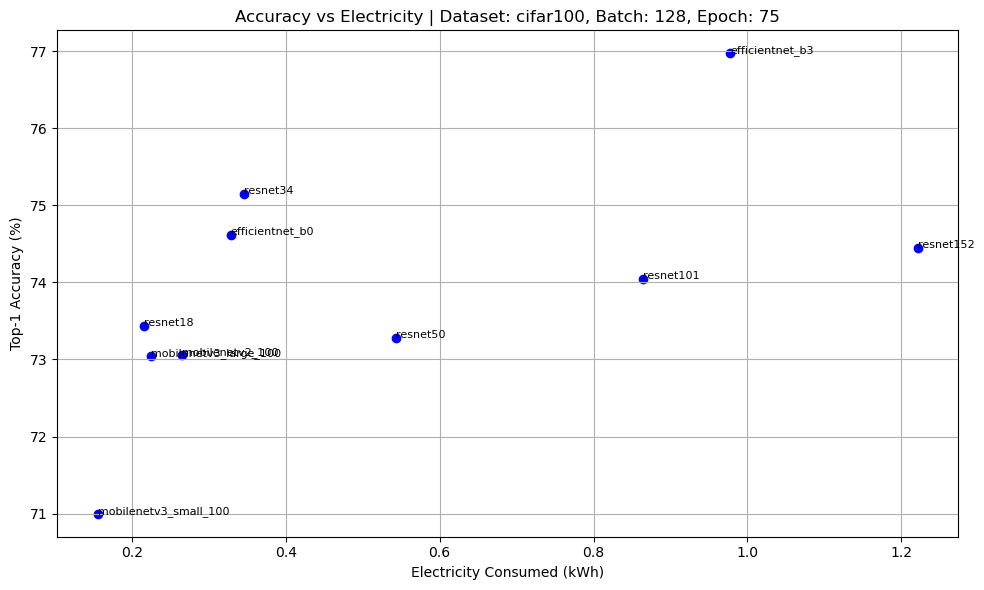

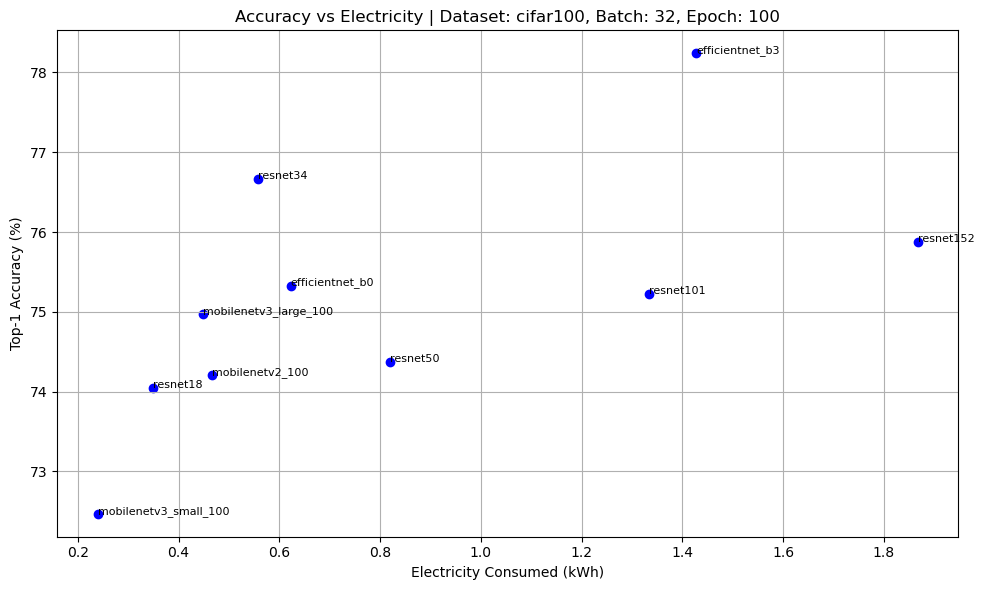

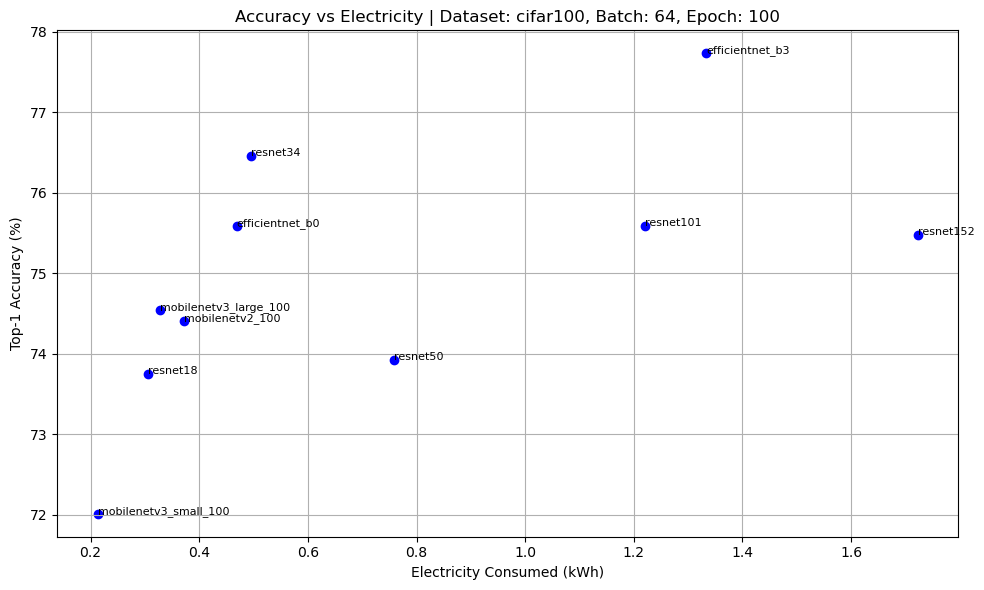

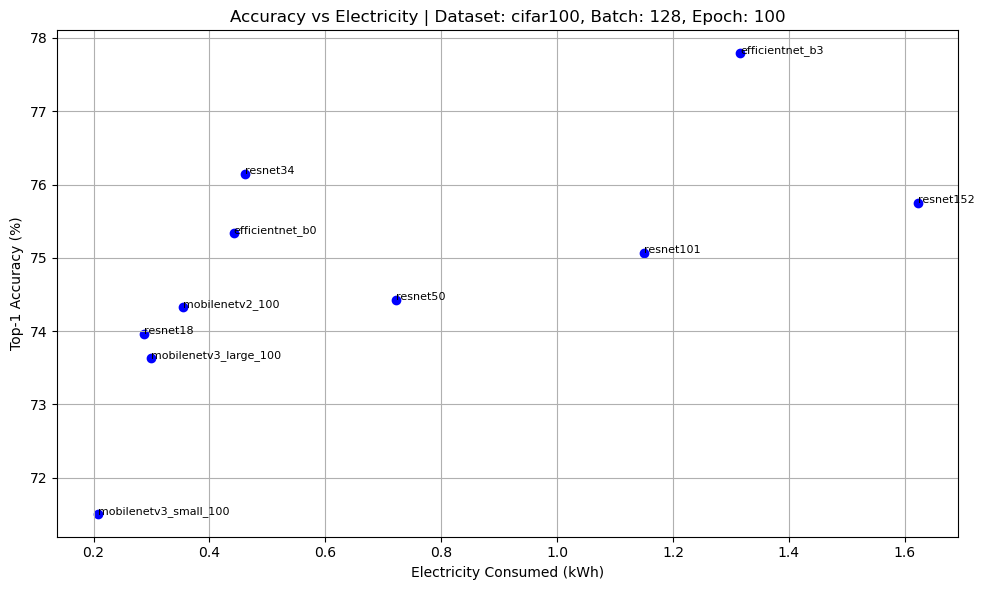

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("./Dataset/image_classification/training_energy_ic.csv")

# Ensure correct column names
df.columns = [col.strip().lower() for col in df.columns]  # normalize names

# Get unique combinations
combinations = df[['dataset', 'batch_size', 'epochs']].drop_duplicates()

# Loop over each combination and plot
for _, combo in combinations.iterrows():
    dataset = combo['dataset']
    batch = combo['batch_size']
    epoch = combo['epochs']

    # Filter data for this configuration
    filtered_df = df[
        (df['dataset'] == dataset) &
        (df['batch_size'] == batch) &
        (df['epochs'] == epoch)
    ]

    # Group by model and average metrics
    summary = filtered_df.groupby('model')[['energy_consumed', 'eval_top1']].mean().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(summary['energy_consumed'], summary['eval_top1'], color='blue')

    # Annotate points
    for _, row in summary.iterrows():
        plt.text(row['energy_consumed'], row['eval_top1'], row['model'], fontsize=8)

    plt.title(f"Accuracy vs Electricity | Dataset: {dataset}, Batch: {batch}, Epoch: {epoch}")
    plt.xlabel("Electricity Consumed (kWh)")
    plt.ylabel("Top-1 Accuracy (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


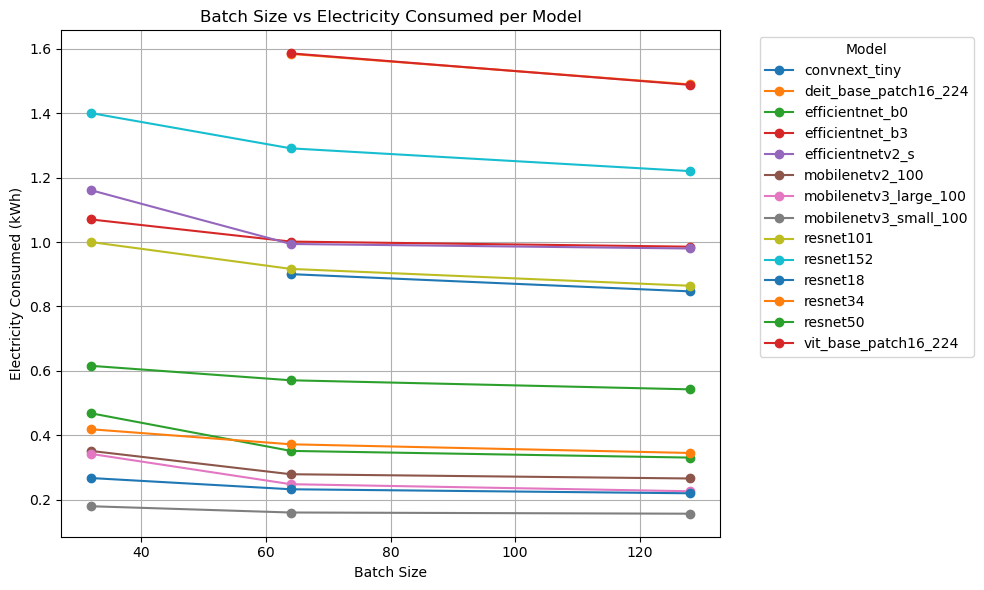

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("./Dataset/image_classification/training_energy_ic.csv")

# Normalize column names
df.columns = [col.strip().lower() for col in df.columns]

# Rename for clarity (if needed)
df = df.rename(columns={'batch': 'batch_size', 'model': 'model', 'epoch': 'epochs'})

# Group by model and batch size, average energy consumed
summary = df.groupby(['model', 'batch_size'])['energy_consumed'].mean().reset_index()

# Plot: batch size vs energy consumed for each model
plt.figure(figsize=(10, 6))
for model in summary['model'].unique():
    model_data = summary[summary['model'] == model]
    plt.plot(model_data['batch_size'], model_data['energy_consumed'], marker='o', label=model)

plt.title("Batch Size vs Electricity Consumed per Model")
plt.xlabel("Batch Size")
plt.ylabel("Electricity Consumed (kWh)")
plt.grid(True)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


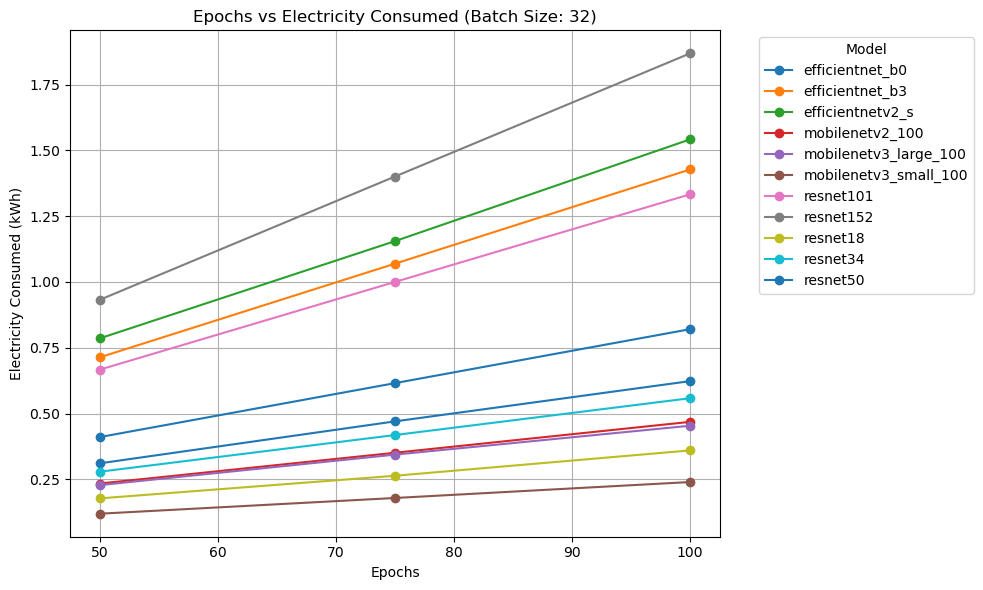

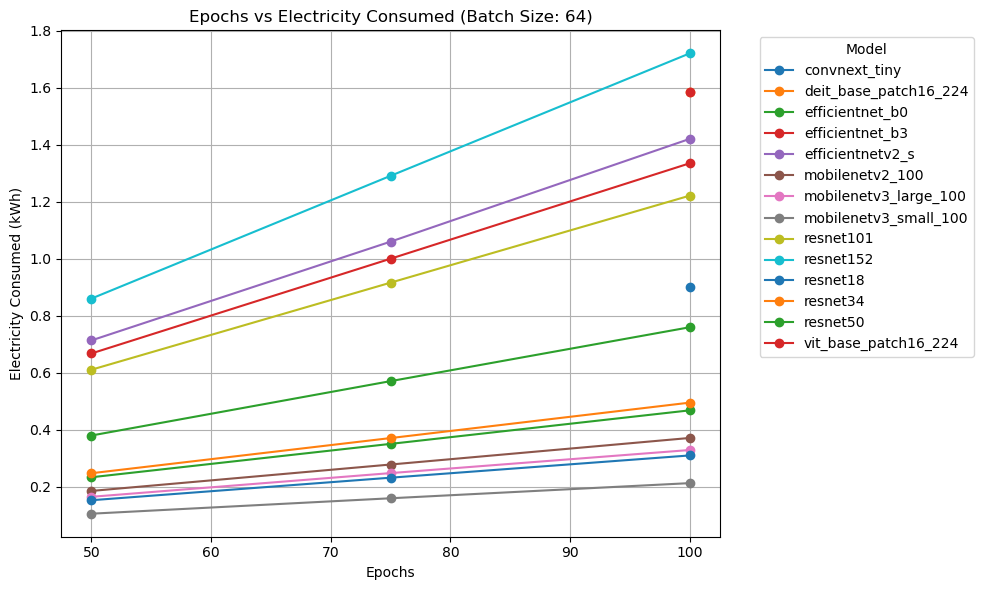

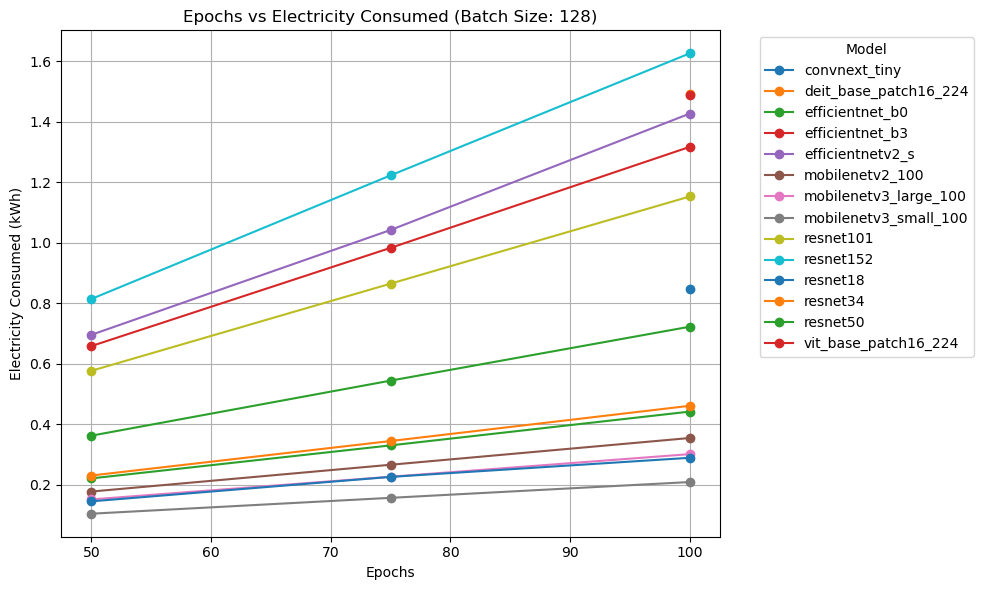

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("./Dataset/image_classification/training_energy_ic.csv")

# Normalize column names
df.columns = [col.strip().lower() for col in df.columns]

# Rename columns for clarity if needed
df = df.rename(columns={'batch': 'batch_size', 'model': 'model', 'epoch': 'epochs'})

# Loop through each unique batch size
for batch in sorted(df['batch_size'].unique()):
    batch_df = df[df['batch_size'] == batch]

    # Group by model and epochs, average energy consumption
    summary = batch_df.groupby(['model', 'epochs'])['energy_consumed'].mean().reset_index()

    # Plot for this batch size
    plt.figure(figsize=(10, 6))
    for model in summary['model'].unique():
        model_data = summary[summary['model'] == model]
        plt.plot(model_data['epochs'], model_data['energy_consumed'], marker='o', label=model)

    plt.title(f"Epochs vs Electricity Consumed (Batch Size: {batch})")
    plt.xlabel("Epochs")
    plt.ylabel("Electricity Consumed (kWh)")
    plt.grid(True)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


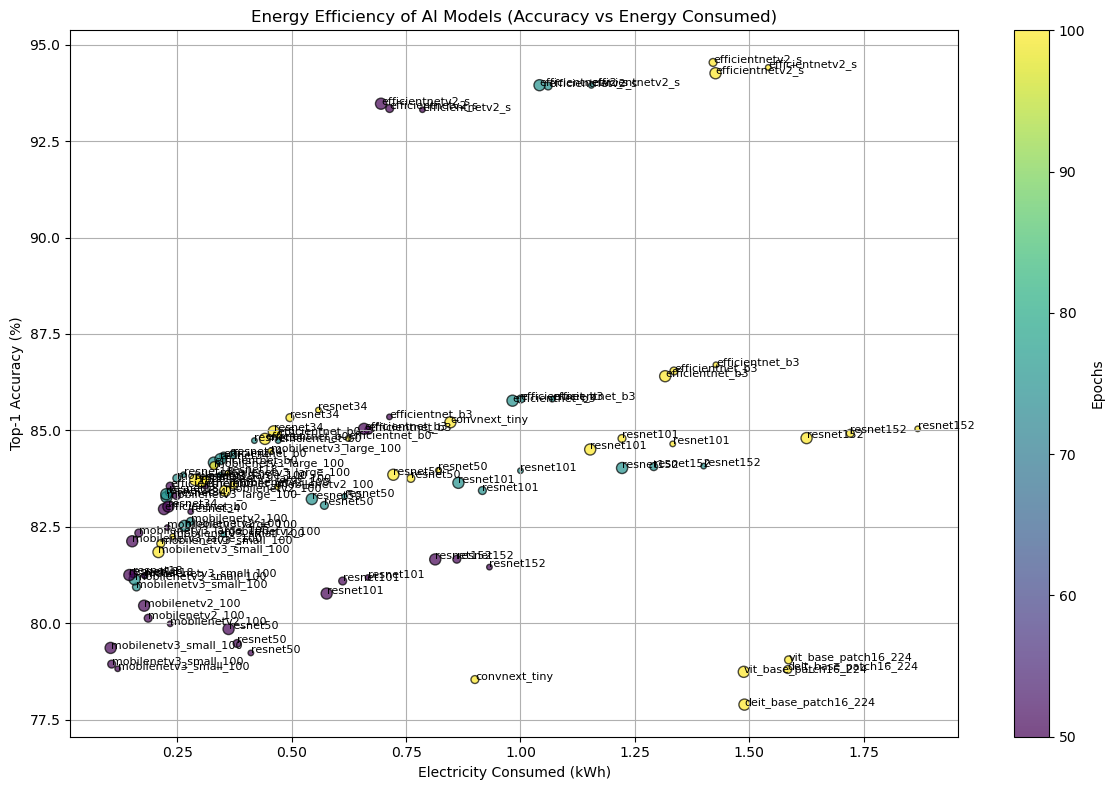

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("./Dataset/image_classification/training_energy_ic.csv")

# Normalize column names
df.columns = [col.strip().lower() for col in df.columns]
df = df.rename(columns={'batch': 'batch_size', 'model': 'model', 'epoch': 'epochs'})

# Average per model, batch_size, epoch
summary = df.groupby(['model', 'batch_size', 'epochs']).agg({
    'energy_consumed': 'mean',
    'eval_top1': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    summary['energy_consumed'],
    summary['eval_top1'],
    c=summary['epochs'],
    s=summary['batch_size'] * 0.5,  # adjust scale as needed
    cmap='viridis',
    alpha=0.7,
    edgecolors='black'
)

# Annotate points with model name
for _, row in summary.iterrows():
    plt.text(row['energy_consumed'], row['eval_top1'], row['model'], fontsize=8)

# Labels and formatting
plt.xlabel("Electricity Consumed (kWh)")
plt.ylabel("Top-1 Accuracy (%)")
plt.title("Energy Efficiency of AI Models (Accuracy vs Energy Consumed)")
plt.colorbar(scatter, label='Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()
